**Problem Statement** 

We want to optimize the sale prices of the properties based on important factors, such as number of bedrooms, parking area, and many more. The real estate company want:
1. To identify what kind of variables affecting house prices
2. To define accuracy of the model

We will use dataset from [here](https://www.kaggle.com/ashydv/housing-dataset). Please visit to gain more about dataset.

In [4]:
# Import useful library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# import dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ashydv/housing-dataset

  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 6.90MB/s]


In [2]:
!unzip "housing-dataset.zip"

Archive:  housing-dataset.zip
  inflating: Housing.csv             


In [5]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Data Exploration**

In [6]:
print("Shape of dataset: ", df.shape)

Shape of dataset:  (545, 13)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# **Data Cleaning**

In [11]:
df.isnull().sum()*100/df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

**There are no NULL Values**, so the dataset is clean.

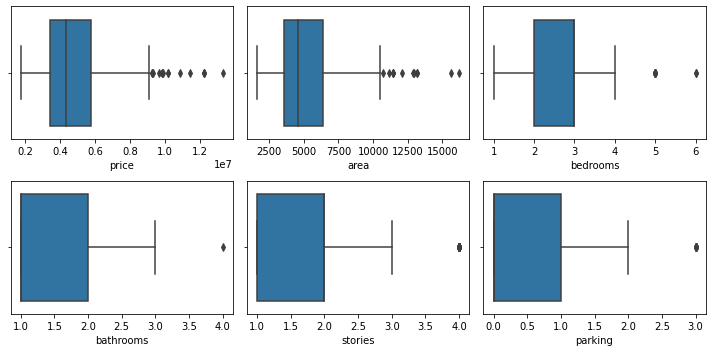

In [13]:
# Outlier analysis
fig, axs = plt.subplots(2, 3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(df['stories'], ax = axs[1,1])
plt6 = sns.boxplot(df['parking'], ax = axs[1,2])
plt.tight_layout()

**There are two outlier, such as Price and Area**, so we drop outliers data.

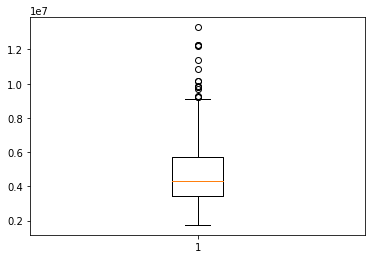

In [14]:
# Handling Price Dataset
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]

In [16]:
print("Shape of dataset", df.shape)

Shape of dataset (530, 13)


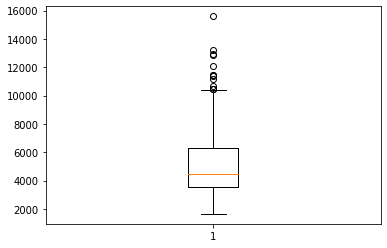

In [17]:
# Handling Area Dataset
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

In [18]:
print("Shape of dataset", df.shape)

Shape of dataset (517, 13)


# **Exploratory Data Analysis**

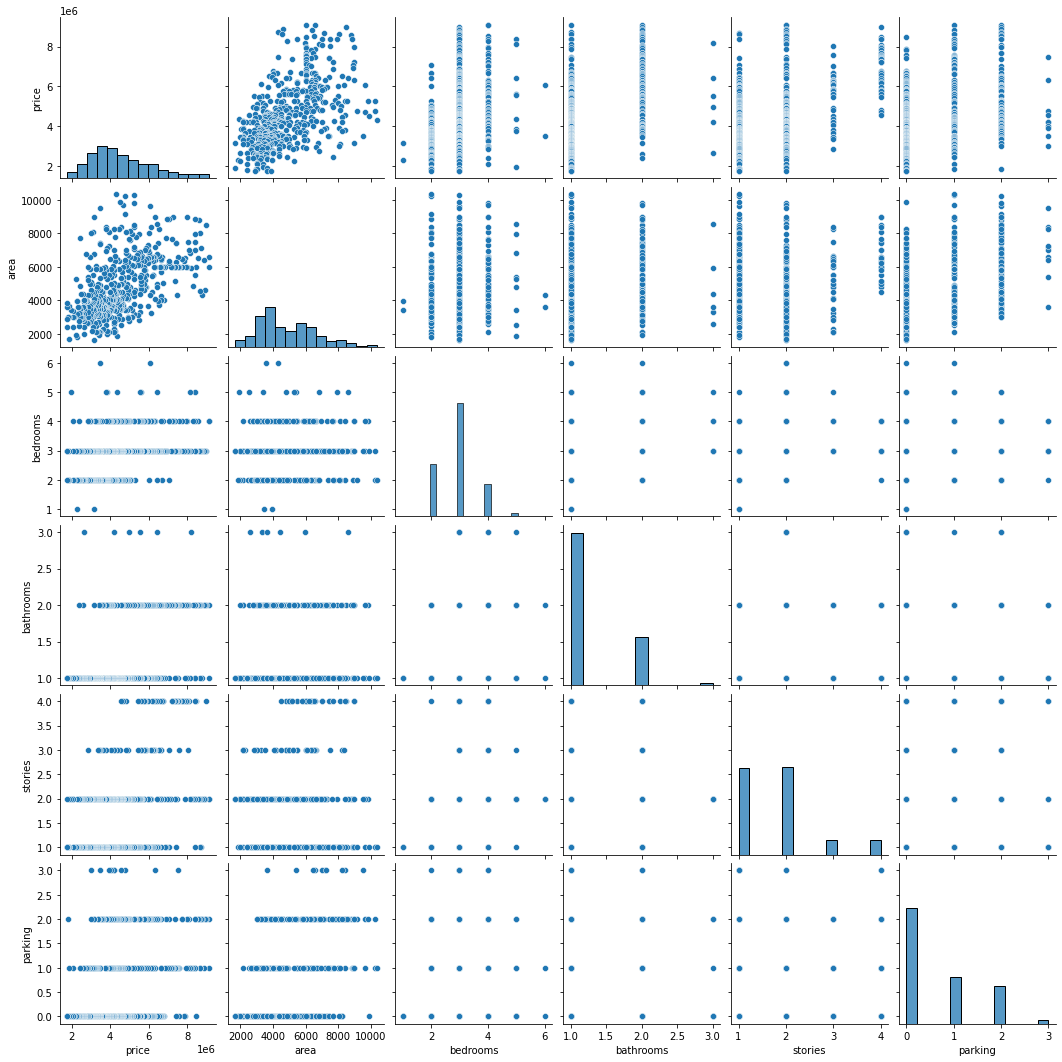

In [19]:
# Numeric variables
sns.pairplot(df)
plt.show()

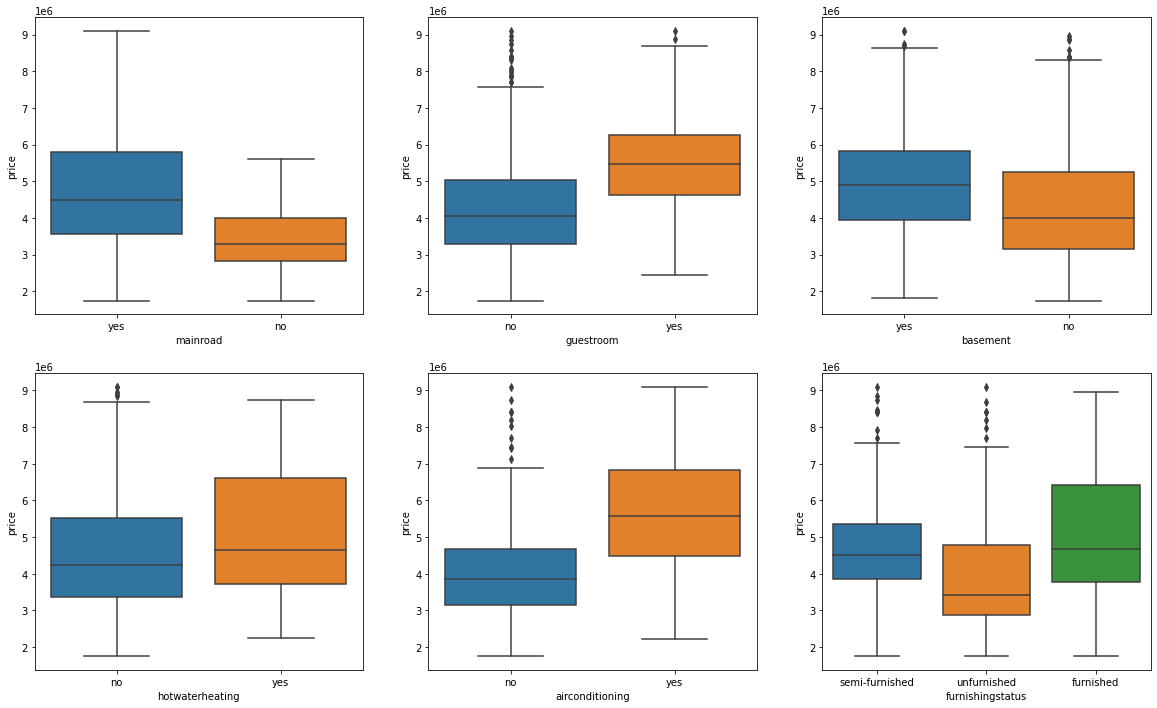

In [20]:
# Categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

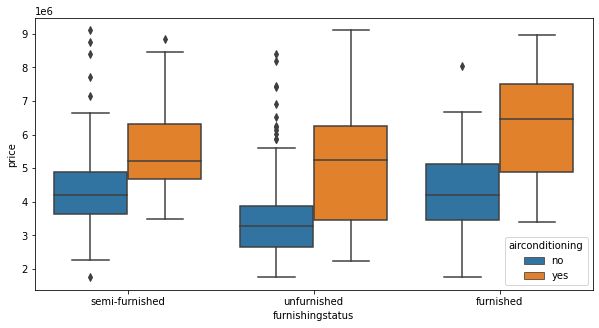

In [21]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', 
            data = df)
plt.show()

# **Build Model**

In [22]:
# dummy variables
vardummy =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
          'airconditioning', 'prefarea']
df[vardummy] = df[vardummy].apply(lambda x: x.map({'yes': 1, "no": 0}))
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,unfurnished
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,furnished
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,furnished
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,semi-furnished


In [24]:
sta = pd.get_dummies(df['furnishingstatus'], drop_first=True)
sta.head()

,semi-furnished,unfurnished
15,1,0
16,0,1
17,0,0
18,0,0
19,1,0


In [25]:
df = pd.concat([df, sta], axis=1)
df = df.drop(['furnishingstatus'], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
16,9100000,6600,4,2,2,1,1,1,0,1,1,1,0,1
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,0,0
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0


In [26]:
# Rescaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

import joblib
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df[num_vars] = scaler.fit_transform(df[num_vars])
joblib.dump(scaler, 'Scaler.joblib')

['Scaler.joblib']

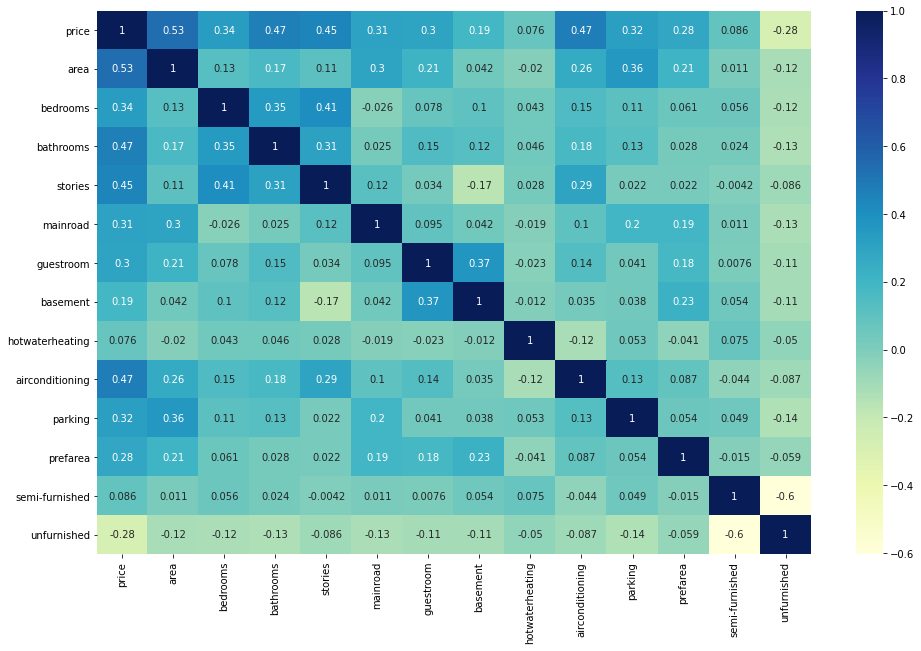

In [27]:
# Correlation
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [32]:
# Splitting data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.7,
                               test_size=0.3, random_state=11)

In [33]:
y_train = train.pop('price')
X_train = train

In [36]:
y_test = test.pop('price')
X_test = test

In [35]:
# Modelling
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
# Prediction
y_pred = model.predict(X_test)

# Evaluation
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rsq = model.score(X_test, y_test)
r2_score=metrics.r2_score(y_test, y_pred)

In [46]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2_score:', r2_score)

Mean Absolute Error: 0.09303735525939008
Mean Squared Error: 0.014922084199185942
Root Mean Squared Error: 0.12215598306749426
R2_score: 0.6699708389608394


In [50]:
data = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1)

In [51]:
dataset = pd.DataFrame({'y_test': data[:, 0], 'y_pred': data[:, 1]})
dataset.to_csv('prediction.csv')

In [56]:
dataset = pd.read_csv('prediction.csv')

In [57]:
# Visualization actual and predicted
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_test'], name='Actual Value',
                         line=dict(color='royalblue', width=3)))
fig.add_trace(go.Scatter(x=dataset['Unnamed: 0'], y=dataset['y_pred'], name = 'Predicted Value',
                         line=dict(color='firebrick', width=2)))

Text(0, 0.5, 'Predicted')

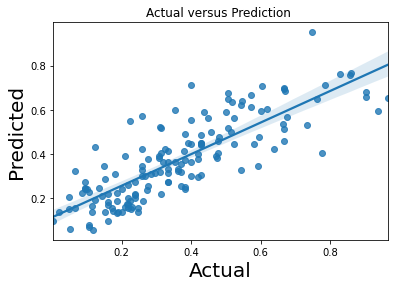

In [58]:
sns.regplot(y_test,y_pred)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)

In [60]:
# Saving model
import pickle

with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)